<H3> Importing The Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data1 = pd.read_csv("C:/Users/sekha/Desktop/Python/194bcff35001e7eb53a2a8b441e8b2c6-92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv",index_col= "#")

<h3> Taking A Closer Look At Our Data And Figuring Out What We Want From It

In [3]:
data1.head(200)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
181,Ampharos,Electric,NaN,510,90,75,85,115,90,55,2,False
181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False
182,Bellossom,Grass,NaN,490,75,80,95,90,100,50,2,False


In [4]:
print(data1["Type 1"].value_counts())

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [5]:
print(data1["Type 1"].nunique())

18


-------------------------------------------------------------------------------------------------------------------------------
We have 18 primary types of pokemon. Now, a Pokemon may have two types and the value from Type 1 cannot be repeated in Type 2. Therefore, there are:

$$ 18*17 + 18 $$
$$ = 324$$
possible types of pokemon. Comparing each type of Pokemon, for each possible combination, becomes a rather tedious task. Hence we shall only focus on the primary type of the Pokemon and derive our results from there. We shall firstly compare the average Speed and HP or health points (arguably the most important stat) of each type. Further, we shall compare the stats of various Legendaries and come to a conclusion on which is the better Legendary in terms of HP and Speed.

-------------------------------------------------------------------------------------------------------------------------------

<h3> Sorting And Analysing The Data By Speed And HP

In [6]:
AD = data1.groupby("Type 1")

In [7]:
avg = AD[["HP", "Speed"]].mean()

In [8]:
pd.set_option('display.max_columns', None)
AD.describe()

Total                                                               \
          count        mean         std    min     25%    50%     75%    max   
Type 1                                                                         
Bug        69.0  378.927536  117.875223  194.0  269.00  395.0  475.00  600.0   
Dark       31.0  445.741935  109.126217  220.0  359.00  465.0  510.00  680.0   
Dragon     32.0  550.531250  146.267538  300.0  420.00  600.0  680.00  780.0   
Electric   44.0  443.409091  105.721952  205.0  362.25  477.5  520.00  610.0   
Fairy      17.0  413.176471  123.781680  218.0  323.00  405.0  483.00  680.0   
Fighting   27.0  416.444444  102.464378  210.0  326.50  455.0  497.50  625.0   
Fire       52.0  458.076923  109.760496  250.0  368.00  482.0  534.00  680.0   
Flying      4.0  485.000000  161.400124  245.0  462.50  557.5  580.00  580.0   
Ghost      32.0  439.562500  110.072685  275.0  335.00  464.5  495.75  680.0   
Grass      70.0  421.142857  106.650626  180.0  318.50  430.0  497.00  630.0   
Ground     32.0  437.500000  123.913081  265.0  329.50  440.0  512.25  770.0   
Ice        24.0  433.458333  108.281027  250.0  305.00  467.5  526.25  580.0   
Normal     98.0  401.683673  115.733038  190.0  302.50  415.0  481.50  720.0   
Poison     28.0  399.142857   92.358687  245.0  323.75  401.5  490.00  535.0   
Psychic    57.0  475.947368  139.026645  198.0  336.00  485.0  600.00  780.0   
Rock       44.0  453.750000  108.059227  280.0  360.25  467.5  516.50  700.0   
Steel      27.0  487.703704  115.420907  300.0  425.00  500.0  580.00  700.0   
Water     112.0  430.455357  113.188266  200.0  328.75  455.0  502.25  770.0   

             HP                                                          \
          count       mean        std   min    25%   50%     75%    max   
Type 1                                                                    
Bug        69.0  56.884058  16.328914   1.0  45.00  60.0   70.00   86.0   
Dark       31.0  66.806452  21.078297  35.0  51.00  65.0   73.50  126.0   
Dragon     32.0  83.312500  23.795415  41.0  67.50  80.0  101.25  125.0   
Electric   44.0  59.795455  17.306511  20.0  50.00  60.0   70.00   90.0   
Fairy      17.0  74.117647  23.587291  35.0  55.00  78.0   90.00  126.0   
Fighting   27.0  69.851852  25.852695  30.0  50.00  70.0   79.00  144.0   
Fire       52.0  69.903846  19.404123  38.0  58.00  70.0   80.00  115.0   
Flying      4.0  70.750000  20.694202  40.0  69.25  79.0   80.50   85.0   
Ghost      32.0  64.437500  31.685895  20.0  45.00  59.5   64.25  150.0   
Grass      70.0  67.271429  19.516564  30.0  51.25  65.5   75.00  123.0   
Ground     32.0  73.781250  25.662492  10.0  56.75  75.0   91.25  115.0   
Ice        24.0  72.000000  21.286861  36.0  54.00  70.0   90.00  110.0   
Normal     98.0  77.275510  36.233430  30.0  55.00  70.0   90.00  255.0   
Poison     28.0  67.250000  19.665019  35.0  50.00  67.5   80.25  105.0   
Psychic    57.0  70.631579  28.421340  20.0  50.00  68.0   80.00  190.0   
Rock       44.0  65.363636  20.833884  30.0  50.00  68.5   80.00  123.0   
Steel      27.0  65.222222  16.044010  40.0  57.00  60.0   75.00  100.0   
Water     112.0  72.062500  27.487026  20.0  52.25  70.0   90.25  170.0   

         Attack                                                            \
          count        mean        std   min    25%    50%     75%    max   
Type 1                                                                      
Bug        69.0   70.971014  37.040904  10.0  45.00   65.0   90.00  185.0   
Dark       31.0   88.387097  25.774247  50.0  65.00   88.0  100.00  150.0   
Dragon     32.0  112.125000  33.742622  50.0  86.25  113.5  134.25  180.0   
Electric   44.0   69.090909  23.764169  30.0  53.75   65.0   85.00  123.0   
Fairy      17.0   61.529412  29.751298  20.0  45.00   52.0   72.00  131.0   
Fighting   27.0   96.777778  28.290163  35.0  80.00  100.0  120.00  145.0   
Fire       52.0   84.769231  28.769275  30.0  62.25   84.5  

In [9]:
avg.sort_values(by = ["HP", "Speed"])

,HP,Speed
Type 1,,
Bug,56.884058,61.681159
Electric,59.795455,84.500000
Ghost,64.437500,64.343750
Steel,65.222222,55.259259
Rock,65.363636,55.909091
Dark,66.806452,76.161290
Poison,67.250000,63.571429
Grass,67.271429,61.928571
Fighting,69.851852,66.074074


In [10]:
avg.sort_values(by = ["Speed", "HP"])

,HP,Speed
Type 1,,
Fairy,74.117647,48.588235
Steel,65.222222,55.259259
Rock,65.363636,55.909091
Bug,56.884058,61.681159
Grass,67.271429,61.928571
Ice,72.000000,63.458333
Poison,67.250000,63.571429
Ground,73.781250,63.906250
Ghost,64.437500,64.343750


As HP happens to be the more important stat in this case, we have sorted primarily by HP and secondarily by Speed. Dragon types on average happen to have the higher HP and the third highest Speed making them the most suitable for selection, based purely on their stats.



<H3> Graphical Comparision



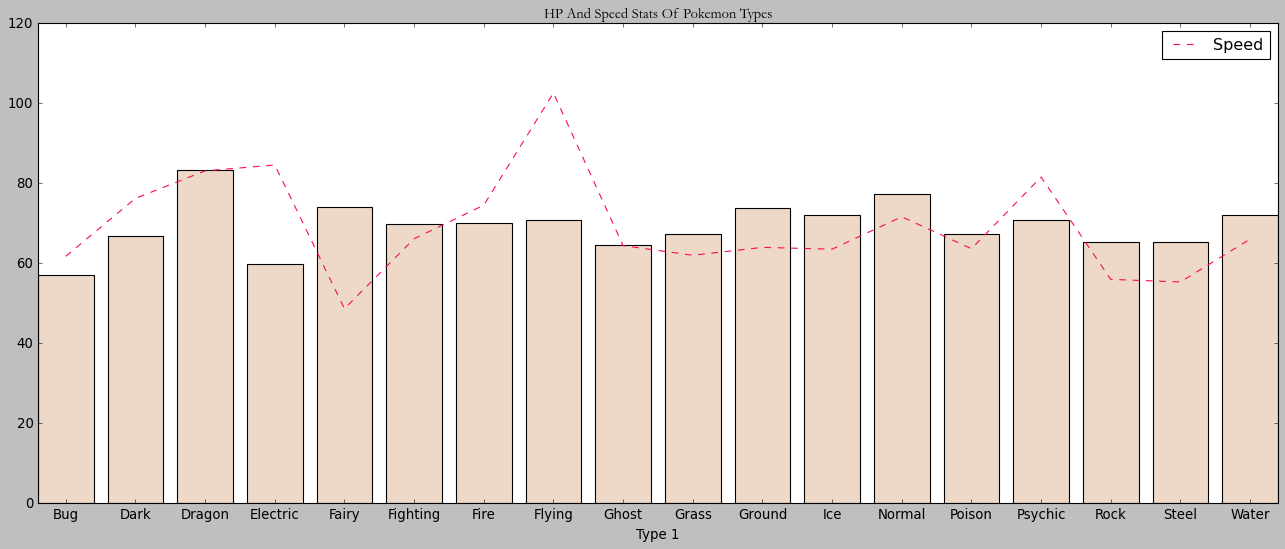

In [39]:
fig = plt.figure(figsize = (20,7.5))
ax = fig.add_subplot()
ax.set_title("HP And Speed Stats Of Pokemon Types", fontsize = 13, fontdict =dict(
        size=20,
        color="Black",
        family="Garamond") )
ax.bar(x = avg.index.values.tolist(), height = "HP", data = avg, color="#EED9C9"
)
avg["Speed"].plot.line(linestyle = "dashed", color= "#F7095C", label = "Speed")
plt.legend();





<h2> Comparing Legendaries 

<h3> Organising And Cleaning The Data

In [12]:
Leg = data1[data1["Legendary"] == True]

In [13]:
Leg.head(50)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True


We shall not consider the Mega Evolutions of already Legendary Pokemon. Thus, these indices need to be cleared.

In [43]:
discard = ["Mega"]
Leg[~Leg.Name.str.contains('|'.join(discard))]
PropLeg = Leg[~Leg.Name.str.contains('|'.join(discard))]
PropLeg.sort_values(by = ["Speed", "HP"], ascending = False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True
641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True


In [50]:
PropLeg[["Name","HP", "Speed"]].sort_values(by = ["HP", "Speed"], ascending = False)

,Name,HP,Speed
#,,,
487,GiratinaAltered Forme,150,90
487,GiratinaOrigin Forme,150,90
716,Xerneas,126,99
717,Yveltal,126,99
646,Kyurem,125,95
646,KyuremBlack Kyurem,125,95
646,KyuremWhite Kyurem,125,95
493,Arceus,120,120
244,Entei,115,100


In [51]:
PropLeg[["Name","HP", "Speed"]].describe()

,HP,Speed
count,59.000000,59.000000
mean,93.237288,98.254237
std,21.786851,22.936639
min,50.000000,50.000000
25%,80.000000,90.000000
50%,91.000000,95.000000
75%,102.500000,109.000000
max,150.000000,180.000000



-------------------------------------------------------------------------------------------------------------------------------
<h3> Conclusion
</h3> <br> By the parameters we've set, Giratina's altered form has the highest HP and Deoxy's speed form has the highest speed. However, their other parameter falls short. Arceus, however, is above the 75th percentile in terms of both speed and HP, which no other Legendary is. We conclude that Arceus would be the optimal choice.